<a href="https://colab.research.google.com/github/Anya232536/EDA_WB/blob/main/DZ_2_Belenok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from scipy import stats

1. Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

Тогда:

$H0: E(x_{i}) = u =12$

$H1: E(x_{i}) = u \neq 12$

In [ ]:
sample = np.array([12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0])
u0 = 12
num = len(sample)-1
stud = stats.t(num)
T = (num)**0.5*(sample.mean() - u0)/sample.std()
P = np.minimum(2*stud.cdf(T), 2 - 2*stud.cdf(T))
print("Statistic: ",T,", p-value: ",P)

Statistic:  2.1578017974978794 , p-value:  0.07430190210562304


In [ ]:
stats.ttest_1samp(sample, u0, alternative='two-sided')

TtestResult(statistic=2.1578017974978794, pvalue=0.07430190210562304, df=6)

На уровне значимость 5% и ниже принимаем нулевую гиротезу, если же уровень значимости выбран 10% - нулевая гипотеза отклоняется в пользу альтернативной.


2. Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

Тогда:

$H0: u_{1} = u_{2}$

$H1: u_{1} \neq u_{2}$

In [ ]:
x = np.array([23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5])
y = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8])

m = len(x)
n = len(y)
s2x = x.var()
s2y = y.var()

T = (x.mean() - y.mean())/(s2x/m + s2y/n)**0.5

df = round( (s2x/m + s2y/n)**2 / ( (s2x/m)**2/(m-1) + (s2y/n)**2/(n-1) ))
St = stats.t(df)

P = np.minimum(2*St.cdf(T), 2 - 2*St.cdf(T))
print("Statistic: ",T,", p-value: ",P)

Statistic:  -1.9376654396809454e-15 , p-value:  0.9999999999999984


In [ ]:
stats.ttest_ind(x,y, alternative = 'two-sided')

TtestResult(statistic=-1.8382308398350186e-15, pvalue=0.9999999999999986, df=18.0)

Полученные результаты говорят о том, что оба метода в среднем дают одинаковые результаты

3. Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?


Тогда:

$H0: u_{1} = u_{2}$

$H1: u_{1} > u_{2}$

In [ ]:
x = np.array([132, 111, 119, 138, 200, 131, 138, 170, 159, 140])
y = np.array([115, 190, 127, 155, 148, 121, 116, 121, 197])

m = len(x)
n = len(y)
s2x = x.var()
s2y = y.var()

T = (x.mean() - y.mean())/(s2x/m + s2y/n)**0.5

df = round( (s2x/m + s2y/n)**2 / ( (s2x/m)**2/(m-1) + (s2y/n)**2/(n-1) ))
St = stats.t(df)

P = 1 - St.cdf(T)
print("Statistic: ",T,", p-value: ",P)

Statistic:  0.03681832098940068 , p-value:  0.48554266145506586


In [ ]:
stats.ttest_ind(x,y).pvalue/2

0.486178812200461

на уровне 5% выдвинутая гипотеза верна: жители городов имеют в среднем такое же систолическое артериальное давление, как жители сельской местности.

4. Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

Тогда:

$H0: p = 0.52$

$H1: p \neq 0.52$

In [ ]:
m = 2500
n = 5000
p0 = 0.52

T = (m-n*p0)/(n*p0*(1-p0))**0.5

binom = stats.binom(5000, 0.52)
P = np.minimum(2*binom.cdf(T), 2 - 2*binom.cdf(T))

print("Statistic: ",T,", p-value: ",P)

Statistic:  -2.830692585361489 , p-value:  0.0


In [ ]:
t = stats.binomtest(2500, 5000, 0.52, alternative='two-sided').pvalue
t

0.0048495021595452836

На уровне значимости 5% нулевая гипотеза отвергается, смертность для мужчин и женщин не одинакова

5. В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0, 001). Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

Причина таких результатов может быть:

- **Разные размеры выборок**: Если в первом эксперименте выборки были достаточно большими, то t-критерий имел более высокую статистическую мощность, что позволило выявить значимые различия даже при сравнительно небольшой разнице между средними (17 и 16). Если же во втором эксперименте выборки были маленькими, то мощность теста могла оказаться недостаточной для обнаружения различий, даже если разница между средними (17 и 36) была больше.

- **Величина стандартных отклонений**: Значимость t-критерия также зависит от дисперсий (или стандартных отклонений) выборок. Если в первом эксперименте стандартные отклонения были небольшими, то различия между средними были более выраженными относительно разброса данных. Во втором эксперименте высокое стандартное отклонение могло "замаскировать" разницу между средними (17 и 36), делая её статистически незначимой.

_________________________________________________________________________________________________________
ДЗ_3

у меня почему-то в ДЗ_3 в гугл форме снова есть возможность пройти тест, прикрепляю фото скрин результатов

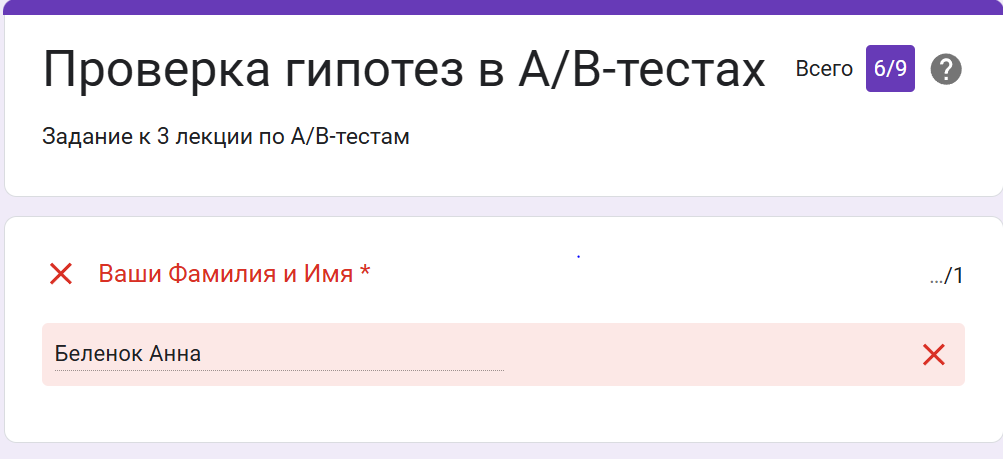

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('experiment_lesson_4.csv')
df_1 = df[df['experiment_group']=='control']
df_2 = df[df['experiment_group']=='test']

(array([ 348., 1870., 4158., 3105.,  566.,   45.]),
 array([15.        , 26.33333333, 37.66666667, 49.        , 60.33333333,
        71.66666667, 83.        ]),
 <BarContainer object of 6 artists>)

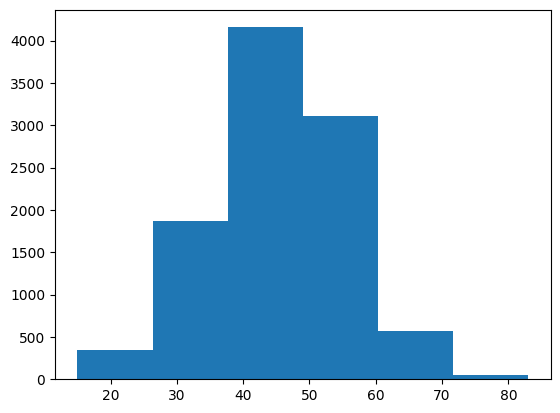

In [32]:
plt.hist(np.array(df_1['delivery_time']), bins = 6)

(array([ 474., 3201., 4697., 1608.,  124.]),
 array([10., 23., 36., 49., 62., 75.]),
 <BarContainer object of 5 artists>)

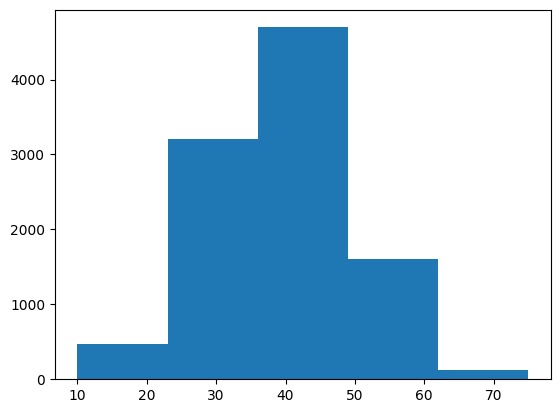

In [34]:
plt.hist(np.array(df_2['delivery_time']), bins = 5)

In [13]:
np.abs(len(df_1) - len(df_2))

12

In [16]:
from scipy import stats
res = stats.normaltest(np.array(df_1['delivery_time']))
res.pvalue

0.8809549607809654

In [17]:
from scipy import stats
res = stats.normaltest(np.array(df_2['delivery_time']))
res.pvalue

0.02983483685333173

In [18]:
np.std(np.array(df_1['delivery_time']))

9.989522000652327

In [19]:
np.std(np.array(df_2['delivery_time']))

9.882819260031342

In [37]:
stats.ttest_ind(np.array(df_2['delivery_time']), np.array(df_1['delivery_time']))

TtestResult(statistic=-43.03582663183714, pvalue=0.0, df=20194.0)

In [24]:
np.array(df_1['delivery_time']).mean()

45.065101070154576

In [25]:
np.array(df_2['delivery_time']).mean()

39.04681314330958

In [27]:
np.array(df_2['delivery_time']).mean() * 100 / np.array(df_1['delivery_time']).mean() - 100

-13.354653121660817